In [62]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import (accuracy_score,log_loss)
from sklearn.ensemble import \
(RandomForestClassifier as RFC,
    RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)


In [64]:
# import dataset

data = pd.read_csv("heart.csv")

In [65]:
#print(data.to_string())
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [66]:
data.shape

(918, 12)

In [67]:
data.isna().sum().sum()

0

In [68]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [69]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.23,0.42,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.55,0.50,0.0,0.00,1.0,1.0,1.0


In [70]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [71]:
data.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5820\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [72]:
data.skew()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5820\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [73]:
data.kurtosis()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5820\2361870383.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


Age            -0.386140
RestingBP       3.271251
Cholesterol     0.118208
FastingBS      -0.401960
MaxHR          -0.448248
Oldpeak         1.203064
HeartDisease   -1.958008
dtype: float64

In [74]:
#Declare feature vector and target variable
X = data.drop(['HeartDisease'], axis= 1)
y = data['HeartDisease']

In [75]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 80, train_size= 20)

In [76]:
# check the shape of the X_train & x_test
X_train.shape , X_test.shape

((20, 11), (80, 11))

In [77]:
# check data types in X_train
X_train.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object

In [78]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
823,64,M,NAP,125,309,0,Normal,131,Y,1.8,Flat
710,47,M,ASY,110,275,0,LVH,118,Y,1.0,Flat
92,52,F,ATA,120,210,0,Normal,148,N,0.0,Up
256,55,F,ATA,130,394,0,LVH,150,N,0.0,Up
263,59,M,ASY,130,126,0,Normal,125,N,0.0,Flat


In [79]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols= ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [80]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
823,64,1,1,125,309,0,1,131,1,1.8,1
710,47,1,2,110,275,0,2,118,1,1.0,1
92,52,2,3,120,210,0,1,148,2,0.0,2
256,55,2,3,130,394,0,2,150,2,0.0,2
263,59,1,2,130,126,0,1,125,2,0.0,1


In [81]:
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
11,58,1,1,136,164,0,1,99,1,2.0,1
8,37,1,2,140,207,0,2,130,1,1.5,1
417,44,1,2,130,209,0,1,127,2,0.0,2
156,38,1,2,110,190,0,2,150,1,1.0,1
489,54,1,2,136,220,0,2,140,1,3.0,1


In [82]:
# instantiate the classifier 
rfc = RFC(random_state= 22)

# fit the  model
model = rfc.fit(X_train, y_train)

# predict the test set results
y_pred = rfc.predict(X_test)

# check accuracy scoure
accuracy_score(y_test, y_pred)
print('Model accuracy score with 10 decision-trees: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees: 0.8125


n_estimators by default is 10, I will increase the number of decision-trees and see its effect on accuracy.

In [83]:
# instantiate the classifier with n_estimators = 1000
nrfc = RFC(n_estimators = 1000, random_state= 22)

# fit the  model
model = nrfc.fit(X_train, y_train)

# predict the test set results
y_pred = nrfc.predict(X_test)

# check accuracy scoure
accuracy_score(y_test, y_pred)
print('Model accuracy score with 1000 decision-trees: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 1000 decision-trees: 0.8250


In [84]:
# view the feature scores
feature_scores = pd.Series(nrfc.feature_importances_, index= X_train.columns).sort_values(ascending= False)
feature_scores

ST_Slope          0.156170
MaxHR             0.143811
ChestPainType     0.136130
Age               0.123861
Oldpeak           0.121816
Sex               0.080673
RestingBP         0.074693
Cholesterol       0.072648
RestingECG        0.059783
ExerciseAngina    0.018289
FastingBS         0.012125
dtype: float64

Text(0, 0.5, 'Features')

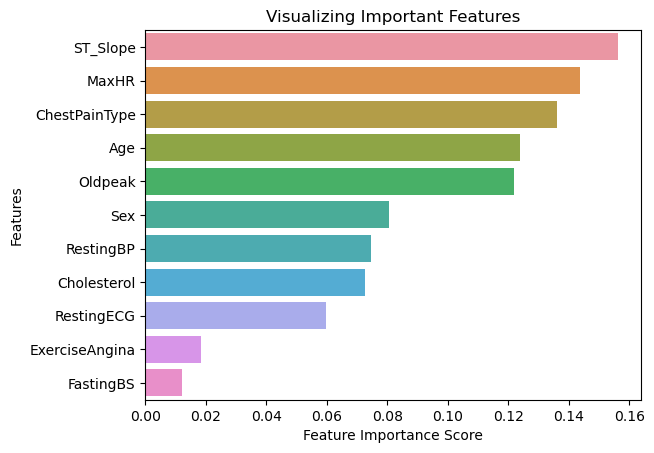

In [85]:
# Creating a seaborn bar plot
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.title("Visualizing Important Features")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
#plt.show()

I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

Build Random Forest model on selected features

In [98]:
X = data.drop(['HeartDisease', 'FastingBS'], axis=1)

y = data['HeartDisease']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size = 0.80,random_state = 22)
encoder = ce.OrdinalEncoder(cols= ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [100]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
414,54,1,1,130,0,1,110,1,3.0,1
676,51,2,1,130,305,1,142,1,1.2,1
753,34,2,2,118,210,1,192,2,0.7,2
351,43,1,1,140,0,2,140,1,0.5,2
224,55,1,2,120,256,1,137,2,0.0,2


In [101]:
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
663,66,1,1,160,246,1,120,1,0.0,1
506,75,1,2,136,225,1,112,1,3.0,1
402,65,1,2,145,0,2,67,2,0.7,1
877,58,1,1,120,284,3,160,2,1.8,1
360,62,1,3,160,0,1,72,1,0.0,1


In [103]:
rf = RFC(n_estimators = 1000, random_state=22)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Model accuracy score with FastingBS variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with FastingBS variable removed : 0.8261


I have removed the FastingBS variable from the model, rebuild it and checked its accuracy. The accuracy of the model with FastingBS variable removed is 0.8261. The accuracy of the model with all the variables taken into account is 0.8250. So, we can see that the model accuracy has been improved with FastingBS variable removed from the model.